# BASTRA NOTEBOOK

En este *notebook* vamos a trabajar con los datos generados por las simulaciones de BASTRA.
Los datos se agruparán por escenarios.

Author: Alvaro Paricio. sept.2016

## Preliminares

Antes de ejecutar los escenarios es preciso hacer las correspondienes importaciones de módulos de python para cálculo científico.

### Imports

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.lines as mlines

import sklearn as sk
import pandas as pd

### Functions

#### Function draw_histogram
Plots an histogram based on the dataset.

In [2]:
def draw_histogram( name, ds_raw ):
    ds = ds_raw.loc[ ds_raw['t_arrival_secs'] > 0 ]
    # ds_raw.head()
    travel_times = ds['t_traveltime_secs']

    cols = 80
    plt.figure(figsize=(18,8)) 
    y_vals, x_bins, patches = plt.hist(travel_times, cols, normed=0, facecolor='green', alpha=0.50)
    x_mean = np.mean(travel_times)
    x_median = np.median(travel_times)
    y_mean = np.mean(y_vals)
    y_median = np.median(y_vals)
    r_mean = np.mean(ds['route_path_num'])
    r_median = np.median(ds['route_path_num'])
    # l_mean = np.mean(ds['route_length'])
    # l_median = np.median(ds['route_length'])
    l_mean = 1
    l_median = 1

    # add a 'best fit' line
    y1_vals = np.append( y_vals, y_vals[cols-1] )

    x2_mean = [ x_mean for i in y1_vals ]
    x3_median = [ x_median for i in y1_vals ]
    y2_mean = [ y_mean for i in x_bins ]
    y3_median = [ y_median for i in x_bins ]

    # print( "X-VALS: ", len(x_bins), " ", x_bins.__repr__, )
    # print( "Y_VALS: ", len(y1_vals), " ", y1_vals.__repr__, )
    # print( "X-MEAN: ", len(x2_mean), " ", x2_mean.__repr__, )
    # print( "X-MEDIAN: ", len(x3_median), " ", x3_median.__repr__, )

    print(
        "Experiment:", name, "\n",
        "Trips Total:", ds_raw['id'].count(), "\n"
        "Trips Completed:", travel_times.count(), "\n"
        "   * Travel time (mean):", x_mean, "\n",
        "  * Travel time (median):", x_median, "\n",
        "  * Route lengths (mean):", l_mean, "\n",
        "  * Route lengths (median):", l_median, "\n",
        "  * Route paths (mean):", r_mean, "\n",
        "  * Route paths (median):", r_median, "\n",
        )

    line_estimation = plt.plot(x_bins, y1_vals, 'r-', label='Estimation', linewidth=2, color='darkgreen')
    line_mean = plt.plot(x2_mean, y1_vals, label='Mean', linestyle='-', linewidth=2, color='blue')
    line_median = plt.plot(x3_median, y1_vals, label='Median', linestyle='-', linewidth=2, color='red')

    plt.xlabel('Travel Time')
    plt.ylabel('Frecuency')
    # plt.title(r'$\mathrm{Histogram\ of\ Travel Times: }\ $' + name )
    plt.title("Travel Times Histogram: "+name )
    mean_line = mlines.Line2D([], [], color='blue', markersize=1, label='Mean')
    median_line = mlines.Line2D([], [], color='red', markersize=1, label='Median')
    plt.legend(handles=[median_line, mean_line], bbox_to_anchor=(1.15, 0.9))

    # plt.axis([travel_times.min(), travel_times.max()+1, 0, 0.03])
    plt.grid(True)

    # If plotting OUTSIDE the notebook, set interactive mode ON/OFF
    # plt.ioff()
    # plt.ion()

    plt.show()

#### Function process_scenario
Uploads results from scenario execution and plots an histogram based on the dataset.
* Select only those vehicles that finish the trip, i.e. have arrive time > 0.

In [3]:
def process_scenario( path, experiment ):
    datafile = path + "/experiments/" + experiment + ".csv"
    # print( "DATAFILE: ", datafile )
    # ds means "dataset"
    ds_raw = pd.read_csv(datafile)
    draw_histogram( experiment, ds_raw )

## Simulation: GRID basic

Apply 2 weighted maps with penalty to routes, inside a network with GRID topology. Maps will be applied during all the simulation. Only 50% of the vehicles will use the system.

**Scenario**
* Name = "Grid"
* Basic reference GRID scenario.
* Execution date: 160926_124432
* Process time: 

**Simulation Time**
* Begin = 0
* End = 10000

**SUMO Traffic**
* Network:
    * Grid style: 16x16
    * File = "../scenes/Grid/grid.net.xml"
* Vehicle Types:
    * car (weight=4 -> 80%)
    * motorcycle (weight=1 -> 20%)
* Demand:
    * Traffic background:
        * Time: full simulation
        * Volume: 3000 vehicles
        * Distribution: O/D random (normal)
    * Traffic flows:
        * Time: full simulation
        * 4 traffic flows end2end of grid.
        * Volume: 100 vehicles

**Bastra parameters**
* Logit = 0,5
* Use_blance = true
* foresight_steps = 1 <-- Number of edges in the planned route to be scanned to consider jam.
* foresight_tries = 3 <-- Number of trials to achieve a new route that avoids jam.
* foresight_halting = 3 <-- Size of vehicles queued to understand that there is a jam. 
* foresight_penalty = 50.0 <-- Weight-factor to apply to an edge in the rerouting algorithm, to force duarouter to over-weight this edge selection and thus avoid selection.
* Commands:
    * **Weighted maps**
        * Apply during all the simulation
        * 2 weighted maps, applying 50% to each vehicle type (2) with weights_factor=3 (x3) in the selected routes. So "edge weight = travel_time * weight_factor"
            * file="../scenes/Grid/maps/map1.pen.map.xml" prob="0.50" tag="motorcycle"
            * file="../scenes/Grid/maps/map2.pen.map.xml" prob="0.50" tag="motorcycle"
            * file="../scenes/Grid/maps/map1.pen.map.xml" prob="0.50" tag="car"
            * file="../scenes/Grid/maps/map2.pen.map.xml" prob="0.50" tag="car"

Experiment: data_Grid_160928_121606 
 Trips Total: 3400 
Trips Completed: 3400 
   * Travel time (mean): 195.69617647058823 
   * Travel time (median): 175.0 
   * Route lengths (mean): 1 
   * Route lengths (median): 1 
   * Route paths (mean): 14.758529411764705 
   * Route paths (median): 13.0 



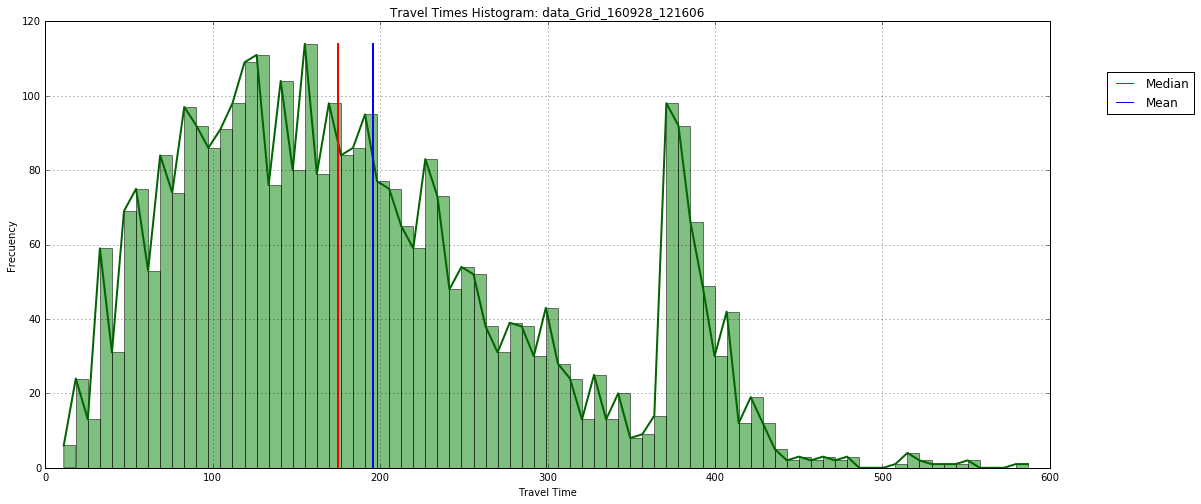

In [4]:
process_scenario( "/Users/alvaro/Desktop/workspace/mutraff/uah-gist-mutraff-bastra", "data_Grid_160928_121606" )

## Simulation: GRID basic (II)

Same as before. Repetition to contrast results.

Apply 2 weighted maps with penalty to routes, inside a network with GRID topology. Maps will be applied during all the simulation. Only 50% of the vehicles will use the system.

**Scenario**
* Name = "Grid"
* Basic reference GRID scenario.
* Execution date: 160928_130326
* Process time: 535 sec
* Platform: MAC-PRO OS-X Darwin

**Simulation Time**
* Begin = 0
* End = 10000

**SUMO Traffic**
* Network:
    * Grid style: 16x16
    * File = "../scenes/Grid/grid.net.xml"
* Vehicle Types:
    * car (weight=4 -> 80%)
    * motorcycle (weight=1 -> 20%)
* Demand:
    * Traffic background:
        * Time: full simulation
        * Volume: 3000 vehicles
        * Distribution: O/D random (normal)
    * Traffic flows:
        * Time: full simulation
        * 4 traffic flows end2end of grid.
        * Volume: 100 vehicles

**Bastra parameters**
* Logit = 0,5
* Use_blance = true
* foresight_steps = 1 <-- Number of edges in the planned route to be scanned to consider jam.
* foresight_tries = 3 <-- Number of trials to achieve a new route that avoids jam.
* foresight_halting = 3 <-- Size of vehicles queued to understand that there is a jam. 
* foresight_penalty = 50.0 <-- Weight-factor to apply to an edge in the rerouting algorithm, to force duarouter to over-weight this edge selection and thus avoid selection.
* Commands:
    * **Weighted maps**
        * Apply during all the simulation
        * 2 weighted maps, applying 50% to each vehicle type (2) with weights_factor=3 (x3) in the selected routes. So "edge weight = travel_time * weight_factor"
            * file="../scenes/Grid/maps/map1.pen.map.xml" prob="0.50" tag="motorcycle"
            * file="../scenes/Grid/maps/map2.pen.map.xml" prob="0.50" tag="motorcycle"
            * file="../scenes/Grid/maps/map1.pen.map.xml" prob="0.50" tag="car"
            * file="../scenes/Grid/maps/map2.pen.map.xml" prob="0.50" tag="car"

Experiment: data_Grid_160928_130326 
 Trips Total: 3400 
Trips Completed: 3400 
   * Travel time (mean): 192.305 
   * Travel time (median): 173.0 
   * Route lengths (mean): 1 
   * Route lengths (median): 1 
   * Route paths (mean): 14.755588235294118 
   * Route paths (median): 13.0 



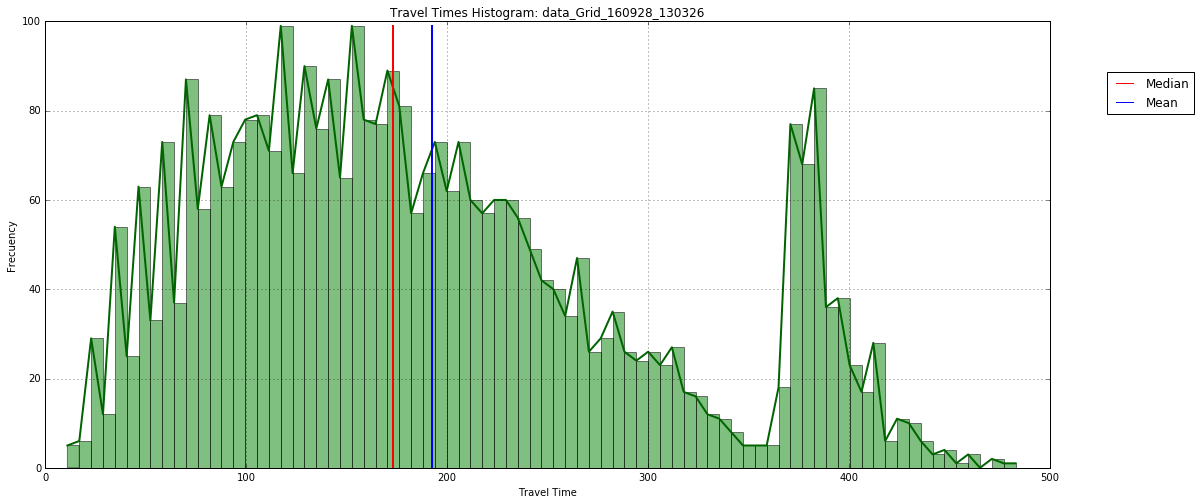

In [5]:
process_scenario( "/Users/alvaro/Desktop/workspace/mutraff/uah-gist-mutraff-bastra",
                 "data_Grid_160928_130326" )